In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:

def price_cn(vec1, vec2):
    return np.linalg.norm(np.array(vec1) - np.array(vec2))
def calc_distance(path, distance):
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i+1]]
    return dis

def get_distance(citys):
    N = len(citys)
    distance = np.zeros((N, N))
    for i, curr_point in enumerate(citys):
        line = []
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in enumerate(citys)]
        distance[i] = line
    return distance

def calc_du(V, distance, N, A, D):
    a = np.sum(V, axis=0) - 1  
    b = np.sum(V, axis=1) - 1  
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
    for i in range(N):
        for j in range(N):
            t2[j, i] = b[j]

    c_1 = V[:, 1:N]
    c_0 = np.zeros((N, 1))
    c_0[:, 0] = V[:, 0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.dot(distance, c)
    return -A * (t1 + t2) - D * c

def calc_U(U, du, step):
    return U + du * step

def calc_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))

def calc_energy(V, distance, N, A, D):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e

def check_path(V, N):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV

def draw_H_and_E(citys, H_path, energys):
    fig = plt.figure(figsize=(12,4))

    ax1 = fig.add_subplot(121)
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='navy')
        p2 = plt.Circle(citys[to_], 0.2, color='navy')
        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='navy')
        ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()

    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(0, len(energys), 1), energys, color='navy')
    plt.savefig('TSP.png')
    plt.show()

def solver(U0, N, num_iter, distance, step, citys, A, D):
    U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)
    V = calc_V(U, U0)
    energys = np.array([0.0 for x in range(num_iter)])  
    best_distance = np.inf 
    best_route = []  
    H_path = []  

    for n in range(num_iter):
        du = calc_du(V, distance, N, A, D)
        U = calc_U(U, du, step)
        V = calc_V(U, U0)
        energys[n] = calc_energy(V, distance, N, A, D)
        route, newV = check_path(V, N)
        if len(np.unique(route)) == N:
            route.append(route[0])
            dis = calc_distance(route, distance)
            if dis < best_distance:
                H_path = []
                best_distance = dis
                best_route = route
                [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
                print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
                [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]
    if len(H_path) > 0:
        draw_H_and_E(citys, H_path, energys)
    else:
        print('没有找到最优解')

第65次迭代找到的次优解距离为：25.294838428776377，能量为：85.78627953270755，路径为：
d,h,a,c,e,g,b,f,d
第247次迭代找到的次优解距离为：22.245523120490127，能量为：166.76295290326226，路径为：
d,a,h,c,e,g,b,f,d
第293次迭代找到的次优解距离为：19.142182332709552，能量为：373.49261322282763，路径为：
d,a,b,c,e,g,h,f,d
第2891次迭代找到的次优解距离为：17.832324037878347，能量为：316.75893362301724，路径为：
a,d,f,g,e,h,b,c,a
第3523次迭代找到的次优解距离为：16.705481427033433，能量为：447.172040418444，路径为：
a,d,g,e,f,h,b,c,a
第7260次迭代找到的次优解距离为：15.543203766865055，能量为：256.1895949799267，路径为：
g,e,f,h,c,b,a,d,g
第8827次迭代找到的次优解距离为：14.714776642118867，能量为：315.10571895905844，路径为：
g,f,h,c,b,a,d,e,g


C:\Users\ZHOUTI~1\AppData\Local\Temp/ipykernel_62248/234833715.py:79: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)


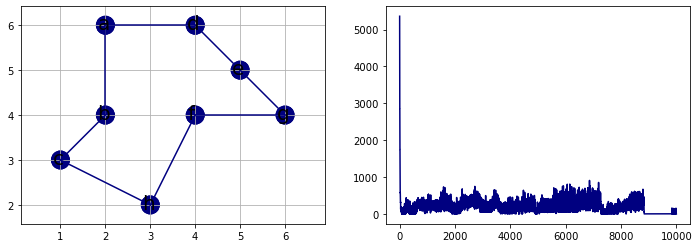

In [8]:
# 固定随机种子
np.random.seed(99)
citys = np.array([[2, 6], [2, 4], [1, 3], [4, 6], [5, 5], [4, 4], [6, 4], [3, 2]])
distance = get_distance(citys)
N = len(citys)
# 设置初始值
A = N * N
D = N / 2
U0 = 0.0009  # 初始电压
step = 0.0001  # 步长
num_iter = 10000  # 迭代次数
solver(U0, N, num_iter, distance, step, citys, A, D)